In [93]:
import pandas as pd
import numpy as np
import seaborn as sns# for data visualization
import matplotlib.pyplot as plt # for data visualization
from pandas.api.types import CategoricalDtype
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score, confusion_matrix

In [162]:
data = pd.read_csv('telecom_users.csv')
data = data[data.columns[2::]]
df = data.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [163]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({ 0: 'No',  1: 'Yes',})
df['Churn'] = df['Churn'].map({ 'No': False, 'Yes': True})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.650024,False
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.199951,False
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.850098,True
3,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.500000,False
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.500000,False


In [164]:
print (df.shape)

(5986, 20)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


### Unbalanced data

<AxesSubplot:>

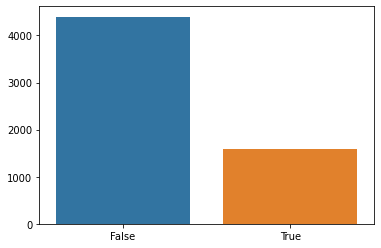

In [166]:
y = df["Churn"].value_counts()
#print(y)
sns.barplot(y.index, y.values)

#### Churn  of Customers 26%

In [167]:
y_True = df["Churn"][df["Churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Churn"].shape[0]) * 100 ))

Churn Percentage = 26.511861009021047


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5986.0,32.468760,24.516391,0.000000,9.0000,29.000000,56.000000,72.000000
MonthlyCharges,5986.0,64.802213,30.114702,18.250000,35.6500,70.400000,89.900000,118.750000
TotalCharges,5976.0,2298.055420,2274.128174,18.799999,404.3125,1412.150024,3846.962402,8684.799805


### Churn by Phone Service

<AxesSubplot:xlabel='PhoneService'>

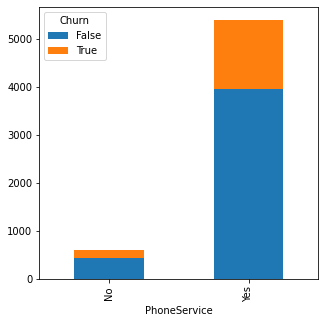

In [169]:
df.groupby(["PhoneService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Internet Service

<AxesSubplot:xlabel='InternetService'>

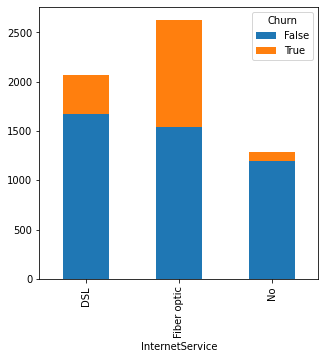

In [170]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Senior Citizen

<AxesSubplot:xlabel='SeniorCitizen'>

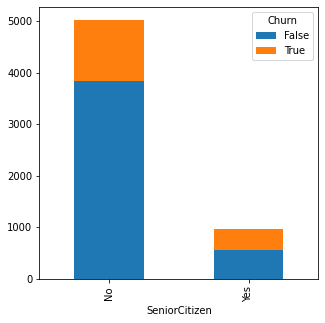

In [171]:
df.groupby(["SeniorCitizen", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Gender

<AxesSubplot:xlabel='gender'>

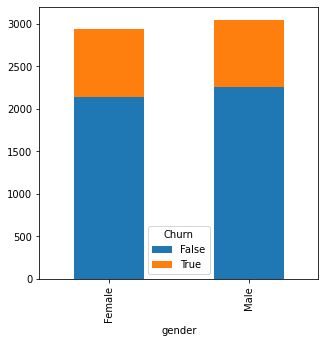

In [172]:
df.groupby(["gender", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<AxesSubplot:xlabel='Partner'>

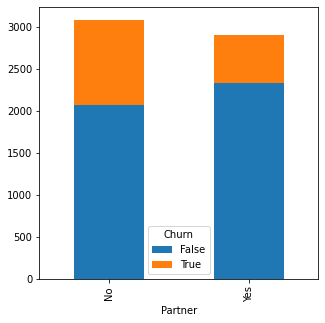

In [173]:
df.groupby(["Partner", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Handle Categorical Cols - Label Encode

In [174]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [175]:
list_cat = list(df.select_dtypes(include = ["object"]))
list_cat


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [176]:
# list_cat has strings and we want discreet integer values
for cat in list_cat:
    df[cat] = label_encoder.fit_transform(df[cat])
#print (df['Voice mail plan'][:4])
print (df.dtypes)

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float32
Churn                  bool
dtype: object


In [177]:
df.shape

(5986, 20)

In [178]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.650024,False
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.199951,False
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.850098,True
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.500000,False
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.500000,False


In [179]:
y = df['Churn'].to_numpy()
df.drop(["Churn"], axis = 1, inplace=True)
y.shape

(5986,)

In [180]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.650024
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.199951
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.850098
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.500000
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.500000


In [181]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [182]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [183]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [184]:
X = np.array(df, dtype=np.float64)
X.shape

(5986, 19)

### Standardize Feature Matrix values

In [185]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

### Since the dataset is unbalanced we should use f1 score to check the model.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

---------- SVC ----------
f1_macro 0.7026382327080274
f1_micro 0.8030050083472455


Text(0.5, 1.0, 'Heatmap of SVC Confusion Matrix')

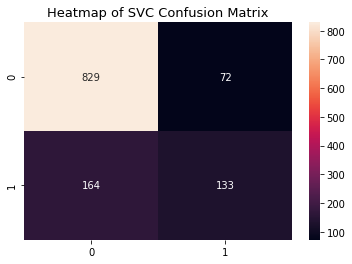

In [190]:
clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svc.fit(X_train, y_train)
pr_svc = clf_svc.predict(X_test)
acc_svc = clf_svc.score(X_test, y_test)

print('-'*10, 'SVC', '-'*10)
print('f1_macro', f1_score(y_test, pr_svc, average='macro'))
print('f1_micro', f1_score(y_test, pr_svc, average='micro'))

svm_svc_conf_matrix = confusion_matrix(y_test, pr_svc)
ax = sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
plt.title('Heatmap of SVC Confusion Matrix', fontsize = 13)

---------- KNN ----------
f1_macro 0.6845699272748357
f1_micro 0.7687813021702838


Text(0.5, 1.0, 'Heatmap of KNN n=7 Confusion Matrix')

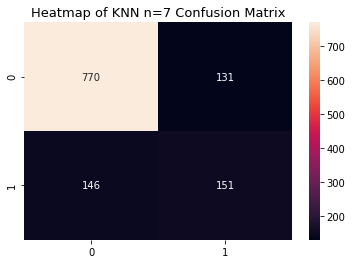

In [189]:
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train, y_train)
pr_knn = clf_knn.predict(X_test)
acc_knn = clf_knn.score(X_test, y_test)

print('-'*10, 'KNN', '-'*10)
print('f1_macro', f1_score(y_test, pr_knn, average='macro'))
print('f1_micro', f1_score(y_test, pr_knn, average='micro'))

knn_conf_matrix = confusion_matrix(y_test, pr_knn)
ax = sns.heatmap(knn_conf_matrix, annot=True,  fmt='');
plt.title('Heatmap of KNN n=7 Confusion Matrix', fontsize = 13)